<a href="https://colab.research.google.com/github/ingridmidory/Aprendizaje-Geom-trico-Profundo/blob/main/Ejercicio_1_Geomstats_23_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Aprendizaje Geométrico Profundo 
---
23. agosto

Ejercicio 1. Geomstats 



In [ ]:
!pip3 install geomstats


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/geomstats/geomstats.git

fatal: destination path 'geomstats' already exists and is not an empty directory.


In [ ]:
import geomstats.backend as gs

gs.random.seed(2020)

In [ ]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import geomstats.visualization as visualization

visualization.tutorial_matplotlib()

In [ ]:
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import geomstats.visualization as visualization

visualization.tutorial_matplotlib()

In [ ]:
from geomstats import geometry

In [ ]:
from geomstats.geometry.hypersphere import Hypersphere

dim = 2         # Se fija la dimensión de la variedad
n_samples = 2   # Declaramos la cantidad de puntos dentro de la muestra


sphere = Hypersphere(dim=dim)
points_in_manifold = sphere.random_uniform(n_samples=n_samples)
print('Points in manifold:\n', points_in_manifold)

linear_mean = gs.sum(points_in_manifold, axis=0) / n_samples
print('Mean of points:\n', linear_mean)

Points in manifold:
 [[-0.84203574  0.03596567 -0.5382214 ]
 [-0.3861891  -0.52946814 -0.75532871]]
Mean of points:
 [-0.61411242 -0.24675124 -0.64677506]


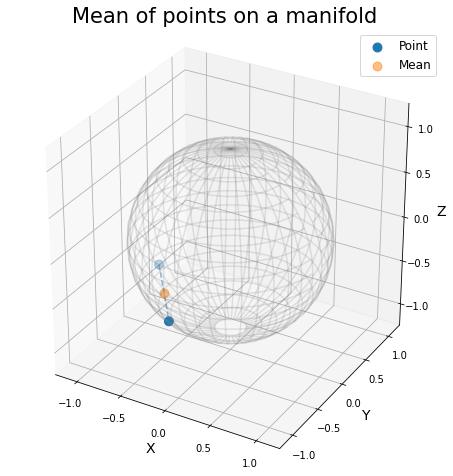

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(
    points_in_manifold, ax=ax, space='S2', label='Point', s=80)

ax.plot(
    points_in_manifold[:, 0], 
    points_in_manifold[:, 1], 
    points_in_manifold[:, 2], 
    linestyle='dashed', alpha=0.5)

ax.scatter(
    linear_mean[0], linear_mean[1], linear_mean[2], 
    label='Mean', s=80, alpha=0.5)

ax.set_title('Mean of points on a manifold')
ax.legend();

In [ ]:
print(sphere.belongs(linear_mean))

False


In [ ]:
import geomstats.datasets.utils as data_utils

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
data, names = data_utils.load_cities()
print(names[:5])
print(data[:5])

['Tokyo', 'New York', 'Mexico City', 'Mumbai', 'São Paulo']
[[ 0.61993792 -0.52479018  0.58332859]
 [-0.20994315  0.7285533   0.65202298]
 [ 0.14964311  0.93102728  0.33285904]
 [-0.27867026 -0.9034188   0.32584868]
 [-0.62952884  0.6662902  -0.3996884 ]]


In [ ]:
sphere.belongs(data)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

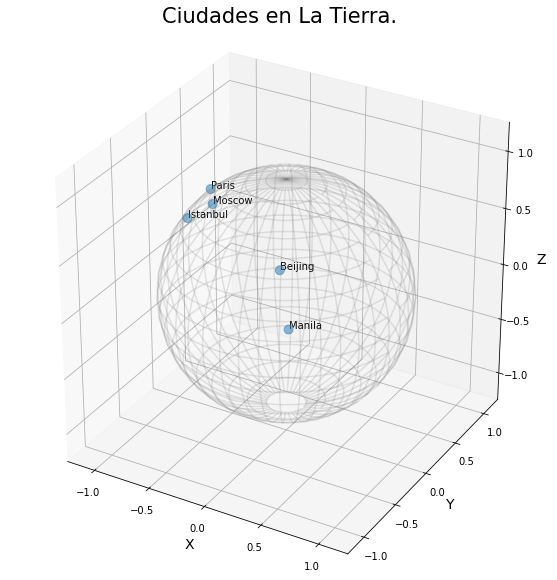

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

visualization.plot(data[15:20], ax=ax, space='S2', label=names[15:20], s=80, alpha=0.5)

ax.set_title('Ciudades en La Tierra.');

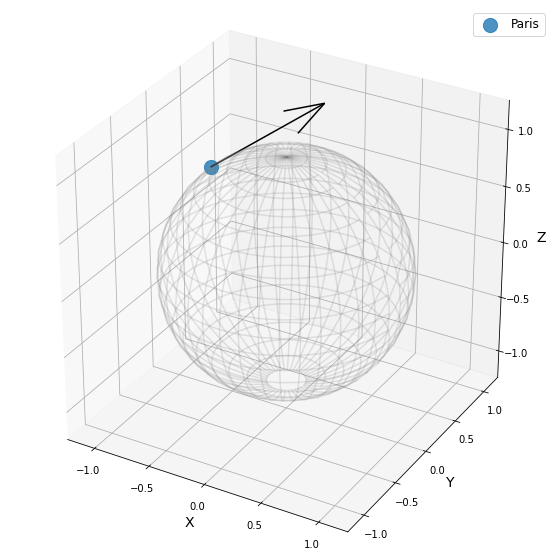

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

paris = data[19]
vector = gs.array([1, 0, 0.8])

ax = visualization.plot(paris, ax=ax, space='S2', s=200, alpha=0.8, label='Paris')

arrow = visualization.Arrow3D(paris, vector=vector)
arrow.draw(ax, color='black')
ax.legend();

In [ ]:
tangent_vector = sphere.to_tangent(vector, base_point=paris)

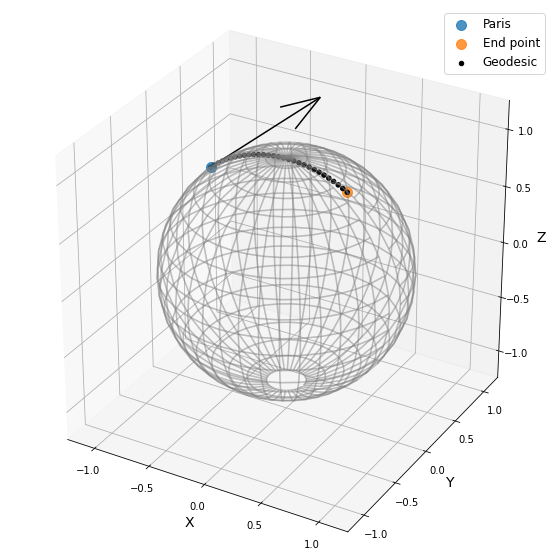

In [ ]:
result = sphere.metric.exp(tangent_vector, base_point=paris)
geodesic = sphere.metric.geodesic(
        initial_point=paris,
        initial_tangent_vec=tangent_vector)

points_on_geodesic = geodesic(gs.linspace(0., 1., 30))

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')


ax = visualization.plot(paris, ax=ax, space='S2', s=100, alpha=0.8, label='Paris')
ax = visualization.plot(result, ax=ax, space='S2', s=100, alpha=0.8, label='End point')
ax = visualization.plot(
    points_on_geodesic, ax=ax, space='S2', color='black', label='Geodesic')

arrow = visualization.Arrow3D(paris, vector=tangent_vector)
arrow.draw(ax, color='black')
ax.legend();

In [ ]:
paris = data[19]
beijing = data[15]

log = sphere.metric.log(point=beijing, base_point=paris)

geodesic = sphere.metric.geodesic(
        initial_point=paris,
        end_point=beijing)

points_on_geodesic = geodesic(gs.linspace(0., 1., 30))

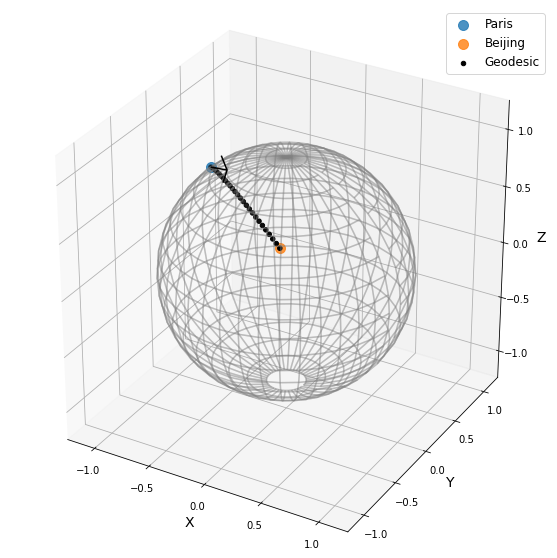

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax = visualization.plot(paris, ax=ax, space='S2', s=100, alpha=0.8, label='Paris')
ax = visualization.plot(beijing, ax=ax, space='S2', s=100, alpha=0.8, label='Beijing')
ax = visualization.plot(
    points_on_geodesic, ax=ax, space='S2', color='black', label='Geodesic')

arrow = visualization.Arrow3D(paris, vector=log)
arrow.draw(ax, color='black')
ax.legend();

In [ ]:
sphere.metric.christoffels(paris, point_type='spherical')

array([[[ 0.        ,  0.        ],
        [ 0.        ,  0.48367223]],

       [[ 0.        , -1.29577972],
        [-1.29577972,  0.        ]]])

In [ ]:
print(paris)

[-0.65726771 -0.02678122  0.7531812 ]


In [ ]:
paris_extri=sphere.intrinsic_to_extrinsic_coords(paris)
print(paris_extri)

[-0.61073699  0.0163602   0.79166449]


In [ ]:
paris_extri=sphere.intrinsic_to_extrinsic_coords(paris)
print(paris_extri)

[-0.61073699  0.0163602   0.79166449]


In [ ]:
paris_int=sphere.extrinsic_to_intrinsic_coords(paris_extri)
print(paris_int)


[0.65726771 3.11481143]


In [ ]:
sphere.metric.dist(paris, beijing)

1.2892896363992132

In [ ]:
vectora = sphere.metric.log(point=beijing, base_point=paris)

In [ ]:
sphere.metric.inner_product(vector, vectora, base_point=paris)

1.1669660994249682

In [ ]:
sphere.metric.squared_norm(vector, base_point=paris)

1.6400000000000001

In [ ]:
sphere.metric.parallel_transport(vector, vectora, base_point=paris)

TypeError: ignored

In [ ]:
from geomstats.learning.frechet_mean import FrechetMean
from geomstats.learning.pca import TangentPCA

In [ ]:
sphere = Hypersphere(dim=2)
data = sphere.random_von_mises_fisher(kappa=15, n_samples=140)

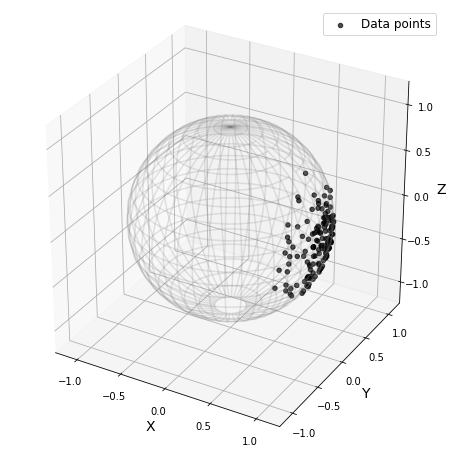

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(data, space='S2', color='black', alpha=0.7, label='Data points')
ax.legend();

In [ ]:
mean = FrechetMean(metric=sphere.metric)
mean.fit(data)

mean_estimate = mean.estimate_

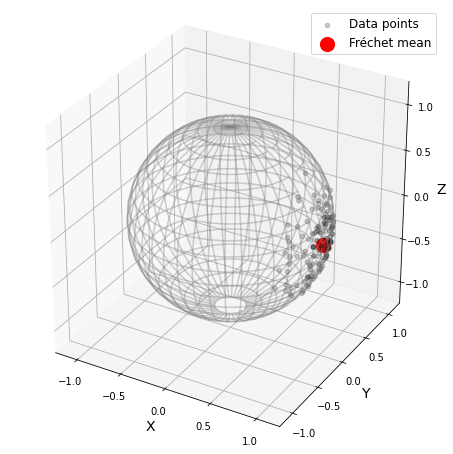

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = visualization.plot(data, space='S2', color='black', alpha=0.2, label='Data points')
ax = visualization.plot(mean_estimate, space='S2', color='red', ax=ax, s=200, label='Fréchet mean')
ax.legend();

In [ ]:
tpca = TangentPCA(metric=sphere.metric, n_components=2)
tpca = tpca.fit(data, base_point=mean_estimate)
tangent_projected_data = tpca.transform(data)

In [ ]:
geodesic_0 = sphere.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[0])
geodesic_1 = sphere.metric.geodesic(
        initial_point=mean_estimate,
        initial_tangent_vec=tpca.components_[1])

n_steps = 100
t = gs.linspace(-1., 1., n_steps)
geodesic_points_0 = geodesic_0(t)
geodesic_points_1 = geodesic_1(t)

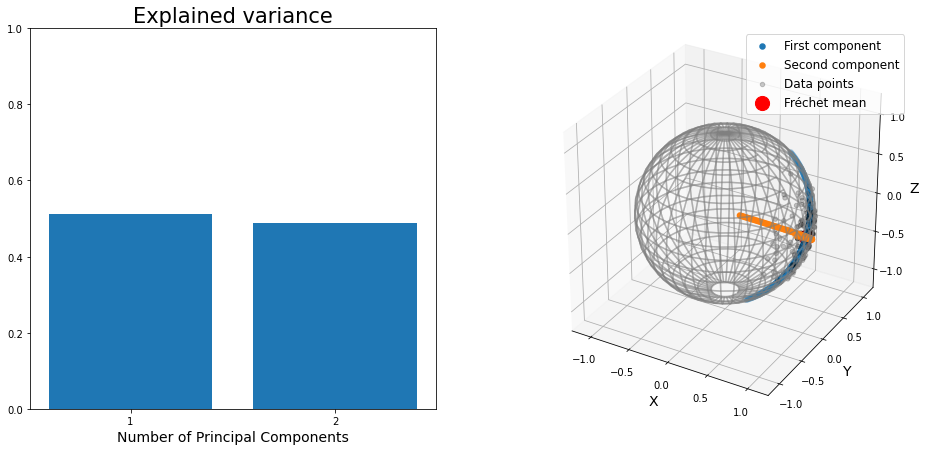

In [ ]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(121)
xticks = gs.arange(1, 2+1, 1)
ax.xaxis.set_ticks(xticks)
ax.set_title('Explained variance')
ax.set_xlabel('Number of Principal Components')
ax.set_ylim((0, 1))
ax.bar(xticks, tpca.explained_variance_ratio_)

ax = fig.add_subplot(122, projection="3d")

ax = visualization.plot(
    geodesic_points_0, ax, space='S2', linewidth=2, label='First component')
ax = visualization.plot(
    geodesic_points_1, ax, space='S2', linewidth=2, label='Second component')
ax = visualization.plot(
    data, ax, space='S2', color='black', alpha=0.2, label='Data points')
ax = visualization.plot(
    mean_estimate, ax, space='S2', color='red', s=200, label='Fréchet mean')
ax.legend()
plt.show()

In [ ]:
from geomstats import geometry

In [ ]:
from geomstats.geometry import hyperbolic

Fin 
